In [ ]:
"""
This function allocates any time series values in monthly/weekly periodicity into weekly/monthly periodicity respectively. 
The main idea of this function is to compute a value per 1 day for each month/week and then return any aggregation you want.

The best case for this function is when you have a time series with monthly periodicity
and you want to convert this time series into weeks.

This function supports ISO calendar system (https://docs.python.org/3/library/datetime.html#datetime.date.isocalendar) 

"""

In [1]:
import pandas as pd
import numpy as np

import datetime as dt
import calendar as cl

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def date_converter(df, date_freq_in='month', date_freq_out='week'):
    
    data=df.copy()
    
    table_index = pd.date_range(data.index.min(), 
                            data.index.max() + 
                            dt.timedelta(days = cl.monthrange(data.index.max().year, data.index.max().month)[1] - 1), 
                            freq="D")
    
    table = pd.DataFrame(index=table_index)
    table['week'] = table.index.week
    table['month'] = table.index.month
    table['year'] = table.index.year
    
    cols = data.columns 
    
    data['week'] = data.index.week
    data['month'] = data.index.month
    data['year'] = data.index.year
    
    if (date_freq_in == 'month') & (date_freq_out == 'week'):
        data['days_in_month'] = pd.Series(data.index).apply(lambda x: cl.monthrange(x.year, x.month)[1]).values
        table['year_iso'] = pd.Series(table.index).apply(lambda x: x.isocalendar()[0]).values #ISO year
        
        for i in cols:
            data[i+"_per_day"] = data[i] / data['days_in_month']
            table = pd.merge(table, data[[i+"_per_day", date_freq_in, 'year']], on=['year', date_freq_in], how='left')
         
        table = table.groupby(['year_iso', date_freq_out]).sum().drop([date_freq_in, 'year'], axis=1)
        table.columns = cols
        table.reset_index(inplace=True)
    
    if (date_freq_in == 'week') & (date_freq_out == 'month'):
        data['days_in_week'] = 7
        
        for i in cols:
            data[i+"_per_day"] = data[i] / data['days_in_week']
            table = pd.merge(table, data[[i+"_per_day", date_freq_in, 'year']], on=['year', date_freq_in], how='left')
         
        table = table.groupby(['year', date_freq_out]).sum().drop(date_freq_in, axis=1)
        table.columns = cols
        table.reset_index(inplace=True)    
    
    
    return table              

In [3]:
df = pd.read_excel('.../data.xlsx', index_col='date')
data_output = date_converter(df, date_freq_in='month', date_freq_out='week')
data_output.head()

,year_iso,week,sales
0,2015,1,29.935484
1,2015,2,52.387097
2,2015,3,52.387097
3,2015,4,52.387097
4,2015,5,55.546083


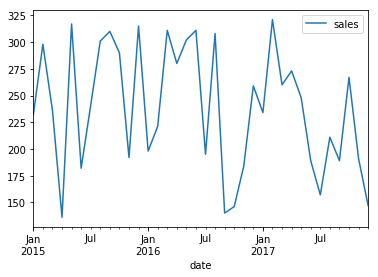

In [4]:
df.plot();

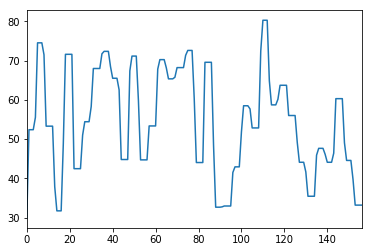

In [5]:
data_output.sales.plot();